# Project: Investigate a Dataset - [Soccer]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This Dataset is the Soccer dataset, containing data for soccer matches and professional players of the top football divisions across 11 countries in Europe between the years of 2008-2016(8 seasons). It is made up of several tables connected by Identification Numbers, these tables include;  
*  Country: This table shows European countries involved.
*  League: This table gives us the leagues under consideration.
*  Match: This table gives information on matches, the home/away teams involved and the outcome of the particular match. The date these games were played are also included.
*  Player: This tell us the profile of a particular player playing club football in the European league.
*  Player Attributes: This tels us the qualities of a player, highlighting their strenghts and weaknesses.
*  Team: This gives us the basic information and Profiles of a team.
* Team Attributes: This table informs us on the streanght and weaknesses of a team.


### Question(s) for Analysis
>  What leagues are we most likely to get a draw?  

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
sns.set_style('whitegrid')

# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1
!pip install --upgrade ipykernel==5.1.2

!pip install --upgrade seaborn

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading data
country = pd.read_csv('Database_Soccer/Country.csv')
league = pd.read_csv('Database_Soccer/League.csv')
match = pd.read_csv('Database_Soccer/Match.csv')
player = pd.read_csv('Database_Soccer/Player.csv')
player_attributes = pd.read_csv('Database_Soccer/Player_Attributes.csv')
team = pd.read_csv('Database_Soccer/Team.csv')
team_attributes = pd.read_csv('Database_Soccer/Team_Attributes.csv')

### Understanding the data

##### country

In [3]:
#Printing information about the country dataframe
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
#Checking for duplicate in the country dataframe
country.duplicated().sum()

0

In [5]:
#accessing the first five rows of the country dataframe to understand it better
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [6]:
# get the dimension of the country dataframe
country.shape

(11, 2)

In [7]:
#A check for missing values
country.isnull().sum()

id      0
name    0
dtype: int64

### This table(country) has no null values or duplicated values, its has two columns which are the id and the column for a corresponding country name with 11 rows

##### league


In [8]:
#accessing the first five rows of the league dataframe
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [9]:
#Getting the dimension of the league df
league.shape

(11, 3)

In [10]:
#printing information on the league df
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [11]:
#Checking the league df for duplicate values
league.duplicated().sum()

0

In [12]:
#Check for missing values
league.isna().sum()

id            0
country_id    0
name          0
dtype: int64

### The league data table has 11 rows and 3 rows, It shows the name of the european leagues under consideration and has the id and country_id column as connector keys with other tables in the data sets, there are no null or duplicated values in this table

###### match

In [13]:
#Getting information summary on the match data frame
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [14]:
# access the first five rows of the match df
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [15]:
### to see all columns in need to use the display max column parameter
pd.set_option('display.max_columns', None)

In [16]:
#getting the first five rows of the match df
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [17]:
# check for duplicated values
match.duplicated().sum()

0

In [18]:
#Check for missing values
match.isnull().describe()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979
unique,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,25979,24158,24158,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24146,24146,24140,24158,24158,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24147,24146,24146,24140,24755,24664,24698,24656,24663,24654,24752,24670,24706,24543,24424,24745,24701,24686,24658,24644,24666,24744,24638,24651,24538,24425,14217,14217,14217,14217,14217,14217,14217,14217,22592,22592,22592,22575,22575,22575,22520,22520,22520,22556,22556,22556,14811,14811,14811,22571,22571,22571,17097,17097,17097,22568,22568,22568,14162,14162,14162,14161,14161,14161


### lets take a look at columns that contains null values in this table by filtering it

In [19]:
#getting the columns with lots of missing values
null_match_cols = (match.columns[match.isnull().any()].tolist())

In [20]:
#checking the number of columns with missing values
len(null_match_cols)

104

### The match table contains 115 columns with 104 of them containing lots of null values, it doesnt have any duplicated column or row and has an id and country id that could be used to connect it to other tables. It gives us the outcome of games, and home and away goals scored. Those are the major information in this table and they contain no null values.


##### player

In [21]:
#Printing information about the player df
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [22]:
#check to see if the player dataframe contains missing values
player.duplicated().sum()

0

In [23]:
#getting the dimension of the player dataframe
player.shape

(11060, 7)

In [24]:
#accessing the five five rows of the players dataframe
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [25]:
# checking for missing values in player df    
player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

### the player table is made up of 7 columns and 11060 rows, its talks about the player and the basic personal information of these players and has and id and player api id columns that could be used to connect to other tables

##### player_attributes

In [26]:
#accessing the first five rows
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [27]:
#getting the dimension of player attributes
player_attributes.shape

(183978, 42)

In [28]:
#Check for duplicates
player_attributes.duplicated().sum()

0

In [29]:
#checks for mising values
player_attributes.isnull().describe()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978,183978
unique,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,183978,183978,183978,183978,183142,183142,183142,180748,183142,183142,183142,183142,183142,181265,183142,181265,183142,183142,183142,183142,183142,181265,183142,181265,183142,181265,183142,183142,183142,183142,183142,183142,181265,183142,183142,183142,181265,183142,183142,183142,183142,183142


In [30]:
na_player =player_attributes.columns[player_attributes.isnull().any()].tolist()

#### This player attributes table shows the qualities of a player, with columns giving ratings that show the strenght and weaknesses of the players, there are lot of null values in this table, like most tables it has the ID, player api id and the fifa player api id columns that could be used to link it together with other tables.

###### team

In [31]:
#accessing the first five rows of the dataframe to understand it better
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [32]:
# get the dimension of the country dataframe
team.shape

(299, 5)

In [33]:
# get the info of the country dataframe
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [34]:
#Checking for duplicate in the  dataframe
team.duplicated().sum()

0

In [35]:
#Checking for null values in the  dataframe
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

#### the team table gives us a list of the clubs and gives us basic information on them. It consists of 5 columns with just one; team_fifa_api_id containing null values, it has columns that could be used to join it with other tables

### team_attributes

In [36]:
#accessing the first five rows of the dataframe to understand it better
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [37]:
# get the dimension of the country dataframe
team_attributes.shape

(1458, 25)

In [38]:
#Checking for missing values in the  dataframe
team_attributes.isnull().describe()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
count,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
unique,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1458,1458,1458,1458,1458,1458,969,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458


In [39]:
#Checking for duplicate in the  dataframe
team_attributes.duplicated().sum()

0

### the team attributes gives us insights on the strenght, weakness and ability of each team, it contains no duplicated value but has a column; the buildup play dribbling which contains lots of nullvalues

### I would work with the match, league,team,country tables as they contain less disturbing data and would give less disinformation unlike those with lots of disturbing data


### Data Cleaning

### lets drop the null values in team attributes

In [40]:
#check for the names of columns
team_attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [41]:
#dropping the column with missing data
team_attributes.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)

#### The match attributes contains lots of null values, we would be dropping most of them as them might pose irregularities if added to our analysis, to do this i would use the drop method and pass the null match value variable i declared earlier that contains a list of columns with missing values

In [42]:
#dropping columns with missing data
match.drop(null_match_cols, axis=1, inplace=True)

##### lets inspect if all columns containing missing values were dropped

In [43]:
#confirm that missing values have been dropped
match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

##### we have to confirm that the datatypes of each value in the columns correlates

In [44]:
# check the datatypes of the columns to see if they are correct
match.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

##### the date column isnt in the pandas datetime datatype, so i would correct that

In [45]:
#converting the date datatype from str to pd datetime
match['date'] = pd.to_datetime(match['date'])
match.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
dtype: object

##### I would merge some of the tables together

In [46]:
# join match with country
match = match.merge(country, how='inner', left_on='country_id', right_on='id')
match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,1,Belgium


### I would drop some columns that are not necessary to the investigation that is to be made because they seem to contain disturbing data.

In [47]:
#### drop id_y, change id_x to id

match.drop('id_y', axis=1, inplace=True)
match.rename(columns={'id_x':'id'}, inplace=True)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium


### I proceed to merge two other tables, match and team

In [48]:
#join match with team to get the home teams
match = match.merge(team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9987,9999,1,1,Belgium,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9987,9984,3,2,Belgium,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9987,9986,1,0,Belgium,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9987,9998,2,0,Belgium,1,9987,673.0,KRC Genk,GEN


### I drop the columns i merged both tables on and the id_y colums, i would also rename the id_y column to id

In [49]:
#dropping columns and renaming them
match.drop(columns=['home_team_api_id','id_y'], axis=1, inplace=True)
match.rename(columns={'id_x':'id'}, inplace=True)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,9987,673.0,KRC Genk,GEN


### i would merge match with team with left merge to get the away team

In [50]:
#merge match with team to get away teams
match = match.merge(team, how='left', left_on='away_team_api_id', right_on='team_api_id')
match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id_y,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,9987,673.0,KRC Genk,GEN,13,9999,546.0,KSV Roeselare,ROS
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,9987,673.0,KRC Genk,GEN,5,9984,1750.0,KSV Cercle Brugge,CEB
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,9987,673.0,KRC Genk,GEN,18,9986,670.0,Sporting Charleroi,CHA
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,9987,673.0,KRC Genk,GEN,8,9998,1747.0,RAEC Mons,MON


### rename some columns

In [51]:
#rename the id_x column to id
match.rename(columns={'id_x':'id'}, inplace=True)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id_y,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,9987,673.0,KRC Genk,GEN,13,9999,546.0,KSV Roeselare,ROS
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,9987,673.0,KRC Genk,GEN,5,9984,1750.0,KSV Cercle Brugge,CEB
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,9987,673.0,KRC Genk,GEN,18,9986,670.0,Sporting Charleroi,CHA
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,9987,673.0,KRC Genk,GEN,8,9998,1747.0,RAEC Mons,MON


### we merge match with the league table

In [52]:
#join match table with the league table
match = match.merge(league, how='inner', left_on='league_id', right_on='country_id')
match.tail()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,name_x,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id_y,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y,id_y,country_id_y,name_y
25974,25936,24558,24558,2015/2016,34,2016-05-16,1992217,10192,1,3,Switzerland,7896,NaN,Lugano,LUG,49117,10192,900.0,BSC Young Boys,YB,24558,24558,Switzerland Super League
25975,25946,24558,24558,2015/2016,36,2016-05-25,1992226,10190,3,0,Switzerland,7896,NaN,Lugano,LUG,49479,10190,898.0,FC St. Gallen,GAL,24558,24558,Switzerland Super League
25976,25960,24558,24558,2015/2016,6,2015-08-22,1992076,9931,1,3,Switzerland,7896,NaN,Lugano,LUG,49118,9931,896.0,FC Basel,BAS,24558,24558,Switzerland Super League
25977,25965,24558,24558,2015/2016,7,2015-08-29,1992081,10199,0,1,Switzerland,7896,NaN,Lugano,LUG,49121,10199,897.0,FC Luzern,LUZ,24558,24558,Switzerland Super League
25978,25978,24558,24558,2015/2016,9,2015-09-22,1992094,10243,0,0,Switzerland,7896,NaN,Lugano,LUG,49124,10243,894.0,FC Zürich,ZUR,24558,24558,Switzerland Super League


### we drop columns we joined on and other columns that wouldnt be needed in our analysis and give those left relative names 

In [53]:
match.drop(columns=['country_id_x', 'league_id','team_fifa_api_id_x','id_y','id_y','country_id_y','team_fifa_api_id_y','team_short_name_x','team_short_name_y','team_api_id_y'], axis=1, inplace=True)
match.rename(columns={'id_x':'id','date_x':'date','name_x':'country_name','team_long_name_x':'home','team_long_name_y':'away','name_y':'league_name'}, inplace=True)
match.head()

,id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,team_api_id_x,home,away,league_name
0,1,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,9987,KRC Genk,Beerschot AC,Belgium Jupiler League
1,29,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,9987,KRC Genk,KSV Roeselare,Belgium Jupiler League
2,47,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,9987,KRC Genk,KSV Cercle Brugge,Belgium Jupiler League
3,65,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,9987,KRC Genk,Sporting Charleroi,Belgium Jupiler League
4,94,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,9987,KRC Genk,RAEC Mons,Belgium Jupiler League


In [54]:
#check for null values
match.isnull().sum()

id                  0
season              0
stage               0
date                0
match_api_id        0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country_name        0
team_api_id_x       0
home                0
away                0
league_name         0
dtype: int64

#### Create columns for the final outcome of each game,home points, away points

In [55]:
# function that gets us the outcome
def result(match):
    
    if (match['home_team_goal'] > match['away_team_goal']):
        return match['home']
    elif (match['home_team_goal'] < match['away_team_goal']):
        return match['away']
    else:
        return 'draw'
    
match['result'] = match.apply(result, axis = 1)


In [56]:
# function that gets us the home point
def points(match):
    if (match['home_team_goal'] > match['away_team_goal']):
        return 3
    elif (match['home_team_goal'] < match['away_team_goal']):
        return 0
    else:
        return 1
match['home_points'] = match.apply(points, axis=1)

In [57]:
#function that gets the away points
def points(match):
    if (match['home_team_goal'] > match['away_team_goal']):
        return 0
    elif (match['home_team_goal'] < match['away_team_goal']):
        return 3
    else:
        return 1
match['away_points'] = match.apply(points, axis=1)

In [58]:
#creating a new column to show if the outcome was a draw or not
match['draw'] = match['result'] == 'draw' 
match["draw"] = match["draw"].astype(int)
match.head()

,id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,team_api_id_x,home,away,league_name,result,home_points,away_points,draw
0,1,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,9987,KRC Genk,Beerschot AC,Belgium Jupiler League,draw,1,1,1
1,29,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,9987,KRC Genk,KSV Roeselare,Belgium Jupiler League,draw,1,1,1
2,47,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,9987,KRC Genk,KSV Cercle Brugge,Belgium Jupiler League,KRC Genk,3,0,0
3,65,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,9987,KRC Genk,Sporting Charleroi,Belgium Jupiler League,KRC Genk,3,0,0
4,94,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,9987,KRC Genk,RAEC Mons,Belgium Jupiler League,KRC Genk,3,0,0


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What leagues are we most likely to get a draw for each season? )

In [59]:
# create variables to hold draws per season using the groupby() method
draw_2009 = match.groupby(by=['season','league_name']).count()['draw']['2008/2009'].sort_values()
draw_2010 = match.groupby(by=['season','league_name']).count()['draw']['2009/2010'].sort_values()
draw_2011 = match.groupby(by=['season','league_name']).count()['draw']['2010/2011'].sort_values()
draw_2012 = match.groupby(by=['season','league_name']).count()['draw']['2011/2012'].sort_values()
draw_2013 = match.groupby(by=['season','league_name']).count()['draw']['2012/2013'].sort_values()
draw_2014 = match.groupby(by=['season','league_name']).count()['draw']['2013/2014'].sort_values()
draw_2015 = match.groupby(by=['season','league_name']).count()['draw']['2014/2015'].sort_values()
draw_2016 = match.groupby(by=['season','league_name']).count()['draw']['2015/2016'].sort_values()

In [60]:
# a table showing the summary of the draws in our dataset
draws = match.groupby(['season','league_name'])[['draw']].count().unstack()
draws

draw                                        \
league_name Belgium Jupiler League England Premier League France Ligue 1   
season                                                                     
2008/2009                      306                    380            380   
2009/2010                      210                    380            380   
2010/2011                      240                    380            380   
2011/2012                      240                    380            380   
2012/2013                      240                    380            380   
2013/2014                       12                    380            380   
2014/2015                      240                    380            380   
2015/2016                      240                    380            380   

                                                                        \
league_name Germany 1. Bundesliga Italy Serie A Netherlands Eredivisie   
season                                                                   
2008/2009                     306           380                    306   
2009/2010                     306           380                    306   
2010/2011                     306           380                    306   
2011/2012                     306           358                    306   
2012/2013                     306           380                    306   
2013/2014                     306           380                    306   
2014/2015                     306           379                    306   
2015/2016                     306           380                    306   

                                                         \
league_name Poland Ekstraklasa Portugal Liga ZON Sagres   
season                                                    
2008/2009                  240                      240   
2009/2010                  240                      240   
2010/2011                  240                      240   
2011/2012                  240                      240   
2012/2013                  240                      240   
2013/2014                  240                      240   
2014/2015                  240                      306   
2015/2016                  240                      306   

                                                                              
league_name Scotland Premier League Spain LIGA BBVA Switzerland Super League  
season                                                                        
2008/2009                       228             380                      180  
2009/2010                       228             380                      180  
2010/2011                       228             380                      180  
2011/2012                       228             380                      162  
2012/2013                       228             380                      180  
2013/2014                       228             380                      180  
2014/2015                       228             380                      180  
2015/2016                       228             380                      180

In [61]:
# return the keys in draw_2009 as a variable
leagues_09 = draw_2009.keys()

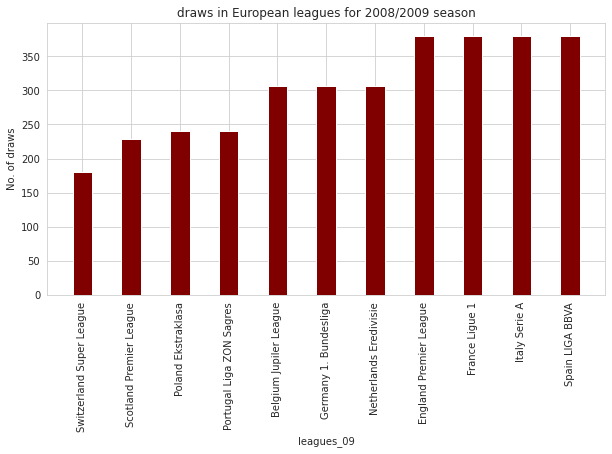

In [62]:
# showing the draws in each league for 2008/2009 season
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(leagues_09, draw_2009, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues_09")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2008/2009 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2008/2009 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [63]:
# return the keys in draw_2010 as a variable
leagues_10 = draw_2010.keys()

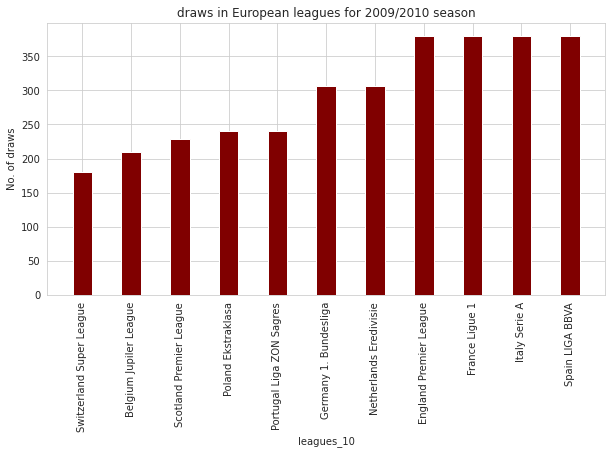

In [64]:
# showing the draws in each league for 2009/2010 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_10, draw_2010, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues_10")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2009/2010 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2009/2010 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [65]:
# return the keys in draw_2011 as a variable
leagues_11 = draw_2011.keys()

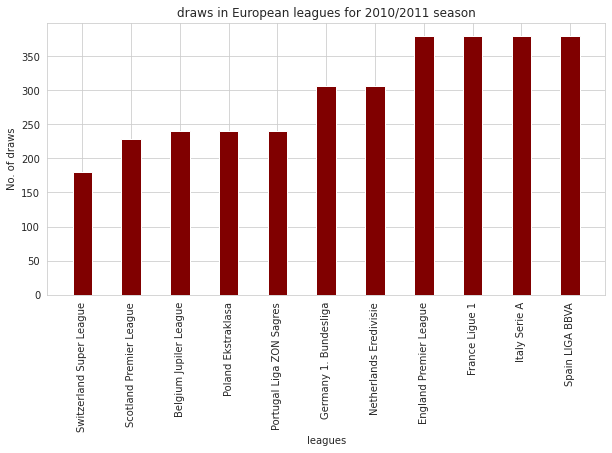

In [66]:
# showing the draws in each league for 2010/2011 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_11, draw_2011, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2010/2011 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2010/2011 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [67]:
# return the keys in draw_2012 as a variable
leagues_12 = draw_2012.keys()

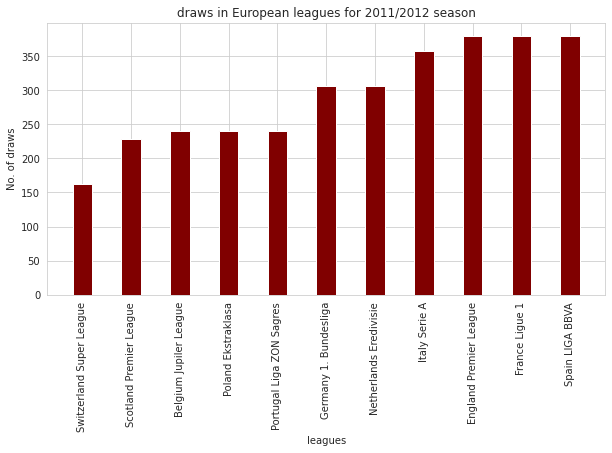

In [68]:
# showing the draws in each league for 2011/2012 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_12, draw_2012, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2011/2012 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2011/2012 season, the league with the lowest draw is the swiss super league while the english, french and spanish leagues have higher and same number of matches ending in draw. In the previous years we explored there was normally a tie between the earlier mention three and the Italian Seria A but that is different now as the Seria A experience a significant drop in the number of draws this season.

In [69]:
# return the keys in draw_2013 as a variable
leagues_13 = draw_2013.keys()

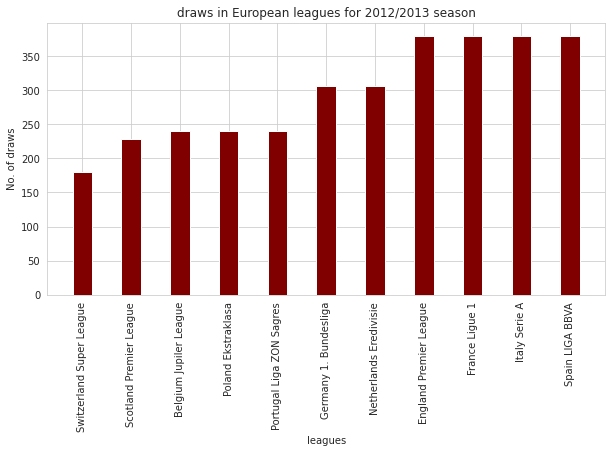

In [70]:
# showing the draws in each league for 2012/2013 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_13, draw_2013, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2012/2013 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2012/2013 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [71]:
# return the keys in draw_2014 as a variable
leagues_14 = draw_2014.keys()

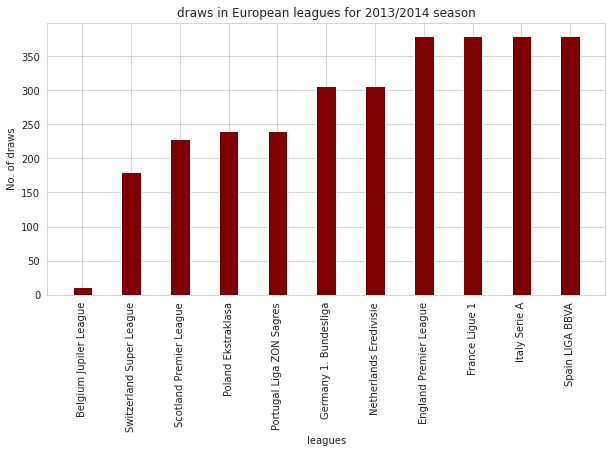

In [72]:
# showing the draws in each league for 2013/2014 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_14, draw_2014, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2013/2014 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2013/2014 season, the league with the lowest draw is the Belgium Jupiler league unlike the norm which used to be the switzerland league, the leagues with the lowest draw this time has very low number of draws compared to what we have seen so far. The english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [73]:
# return the keys in draw_2015 as a variable
leagues_15 = draw_2015.keys()

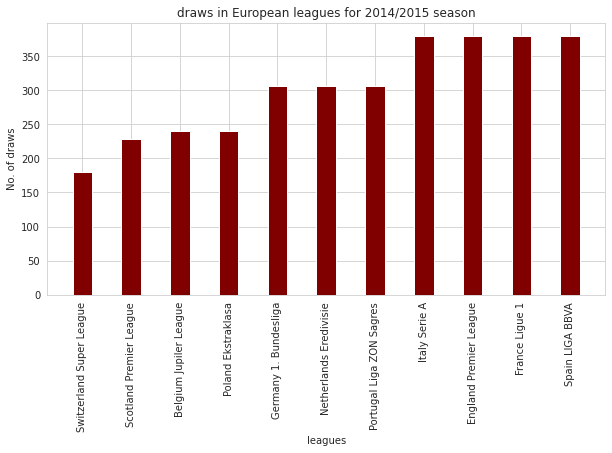

In [74]:
# showing the draws in each league for 2015/2016 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_15, draw_2015, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2014/2015 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2014/2015 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

In [75]:
# return the keys in draw_2016 as a variable
leagues_16 = draw_2016.keys()

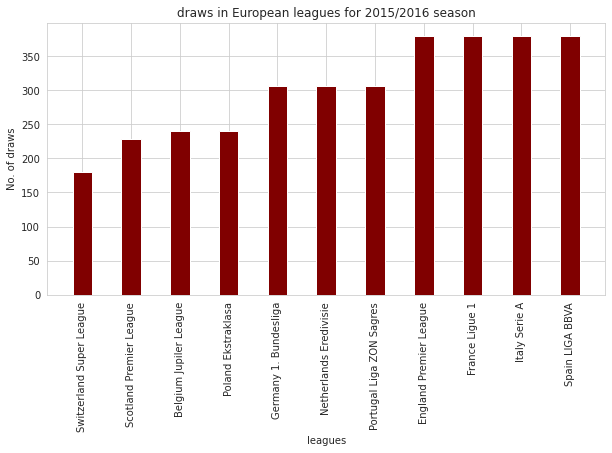

In [76]:
# showing the draws in each league for 2015/2016 season
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leagues_16, draw_2016, color ='maroon',
        width = 0.4)
 
plt.xlabel("leagues")
plt.ylabel("No. of draws")
plt.title("draws in European leagues for 2015/2016 season")
plt.xticks(rotation=90)
plt.show()

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2015/2016 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

## Line Graphs

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


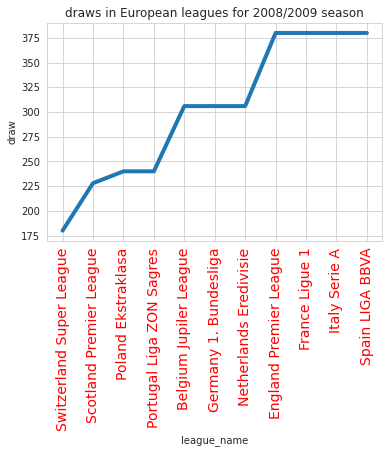

In [77]:
# showing the draws in each league for 2008/2009 season in a line plot
plot_2009 = sns.lineplot(data= draw_2009, linewidth=4)
plot_2009.set_xticklabels(labels=leagues_09,rotation=90,color='red');
plot_2009.set_title('draws in European leagues for 2008/2009 season')
plot_2009.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2008/2009 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


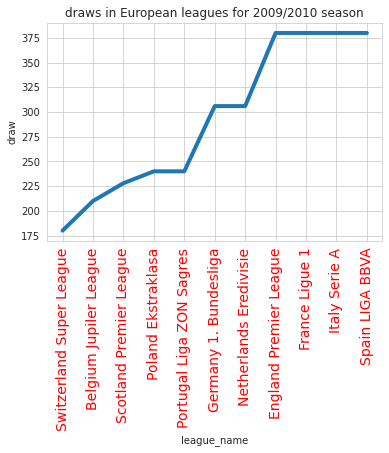

In [78]:
# showing the draws in each league for 2009/2010 season in a line plot
plot_2010 = sns.lineplot(data= draw_2010, linewidth=4)
plot_2010.set_xticklabels(labels=leagues_10,rotation=90,color='red');
plot_2010.set_title('draws in European leagues for 2009/2010 season')
plot_2010.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2009/2010 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


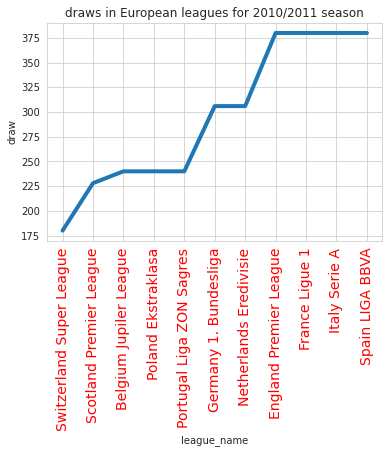

In [79]:
# showing the draws in each league for 2010/2011 season in a line plot
plot_2011 = sns.lineplot(data= draw_2011, linewidth=4)
plot_2011.set_xticklabels(labels=leagues_11,rotation=90,color='red');
plot_2011.set_title('draws in European leagues for 2010/2011 season')
plot_2011.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2010/2011 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


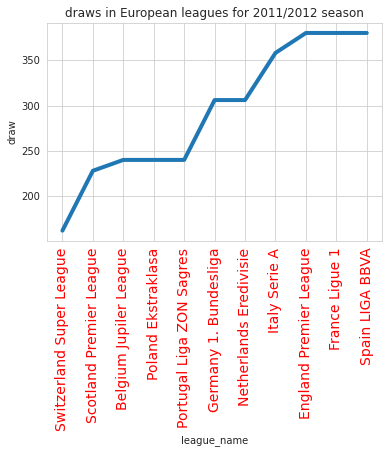

In [80]:
# showing the draws in each league for 2011/2012 season in a line plot
plot_2012 = sns.lineplot(data= draw_2012, linewidth=4)
plot_2012.set_xticklabels(labels=leagues_12,rotation=90,color='red');
plot_2012.set_title('draws in European leagues for 2011/2012 season')
plot_2012.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2011/2012 season, the league with the lowest draw is the swiss super league while the english, french and spanish leagues have higher and same number of matches ending in draw. In the previous years we explored there was normally a tie between the earlier mention three and the Italian Seria A but that is different now as the Seria A experience a significant drop in the number of draws this season.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


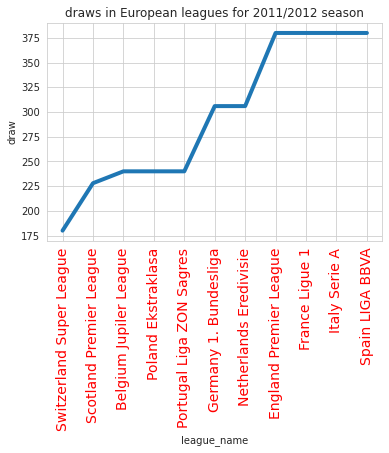

In [81]:
# showing the draws in each league for 2012/2013 season in a line plot
plot_2013 = sns.lineplot(data= draw_2013, linewidth=4)
plot_2013.set_xticklabels(labels=leagues_13,rotation=90,color='red');
plot_2013.set_title('draws in European leagues for 2011/2012 season')
plot_2013.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2012/2013 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


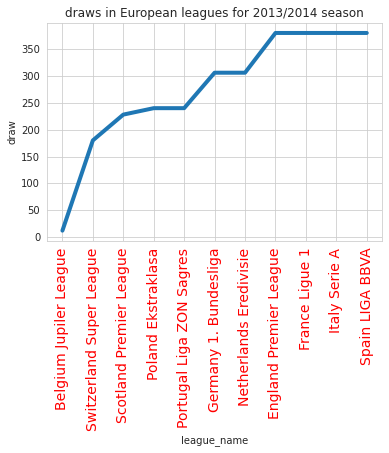

In [82]:
# showing the draws in each league for 2013/2014 season in a line plot
plot_2014 = sns.lineplot(data= draw_2014, linewidth=4)
plot_2014.set_xticklabels(labels=leagues_14,rotation=90,color='red');
plot_2014.set_title('draws in European leagues for 2013/2014 season')
plot_2014.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2013/2014 season, the league with the lowest draw is the Belgium Jupiler league unlike the norm which used to be the switzerland league, the leagues with the lowest draw this time has very low number of draws compared to what we have seen so far. The english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


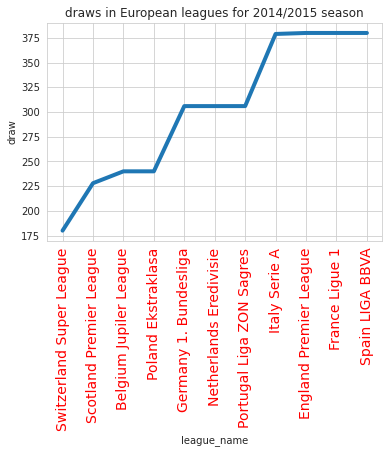

In [83]:
# showing the draws in each league for 2014/2015 season in a line plot
plot_2015 = sns.lineplot(data= draw_2015, linewidth=4)
plot_2015.set_xticklabels(labels=leagues_15,rotation=90,color='red');
plot_2015.set_title('draws in European leagues for 2014/2015 season')
plot_2015.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2014/2015 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


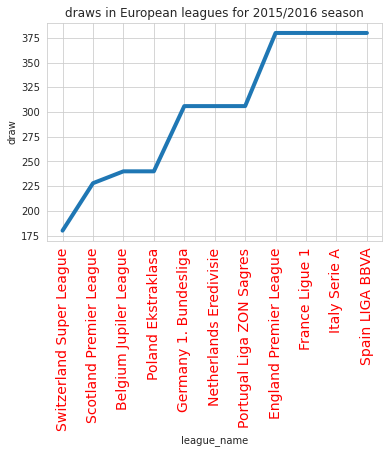

In [84]:
# showing the draws in each league for 2015/2016 season in a line plot
plot_2016 = sns.lineplot(data= draw_2016, linewidth=4)
plot_2016.set_xticklabels(labels=leagues_16,rotation=90,color='red');
plot_2016.set_title('draws in European leagues for 2015/2016 season')
plot_2016.tick_params(axis = 'x', which = 'major', labelsize = 14)

### This is a bar chart that shows in ascending order the number of draws in each of the top division leagues in europe for the 2015/2016 season, the league with the lowest draw is the swiss super league while the english, french, italian and spanish leagues have higher and same number of matches ending in draw

<a id='conclusions'></a>
## Conclusions

### It can be observed that the Spainish league alongside three other leagues(English, French and Italian leagues) tend to experience more draws as outcomes in the games from the 2009/2010 season to the 2015/2016 season. The outcome of games in the Switzerland top division league are less likely to be a draw compared to other leagues for all seasons in consideration except for the 2013/2014 season where the Belgium top tier league hadx a sharp drop in draw recording lower draws than was recorded by any of the leagues in consideration. Draws normally shows that teams are quite equally matched so we could draw conclusions that the Spanish, English, French and Italian leagues are much more competitive than the other leagues in consideration. Values used in the visualization were extracted by grouping 

## Limitations

### The match dataset had lots of null values which led to disturbing datasets we needed to drop, with more data we would have seen which variables have relationships with the outcome resulting to a draw.

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0